In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.common.files import get_processed_paths
from src.common.vision import FrontCameraTransform, WristCameraTransform
import matplotlib.pyplot as plt
from src.data_processing.utils import resize, resize_crop
import zarr
import numpy as np

In [3]:
z_real = zarr.open(
    get_processed_paths(
        controller="diffik",
        domain="real",
        task="one_leg_full",
        demo_source="teleop",
        demo_outcome="success",
        randomness="low",
        suffix=None,
    )[0]
)

In [13]:
samp_idx = np.random.randint(0, z_real["color_image1"].shape[0], 16)
# Get the images for color image 1 and 2
color_image1 = z_real["color_image1"][samp_idx]
color_image2 = z_real["color_image2"][samp_idx]

# Get the wrist camera transform
wrist_camera_transform = WristCameraTransform()

# Get the front camera transform
front_camera_transform = FrontCameraTransform()

color_image1 = resize(color_image1).transpose(0, 3, 1, 2)
color_image2 = resize_crop(color_image2).transpose(0, 3, 1, 2)

color_image1.shape, color_image2.shape

((16, 3, 240, 320), (16, 3, 240, 320))

In [15]:
import torch


front_camera_transform(torch.from_numpy(color_image2)).shape

torch.Size([16, 3, 224, 224])

In [16]:
# Apply the wrist and front camera transforms
color_image1 = np.array([wrist_camera_transform(torch.from_numpy(img)).numpy().transpose(1, 2, 0) for img in color_image1])
color_image2 = np.array([front_camera_transform(torch.from_numpy(img)).numpy().transpose(1, 2, 0) for img in color_image2])

color_image1.shape, color_image2.shape


((16, 224, 224, 3), (16, 224, 224, 3))

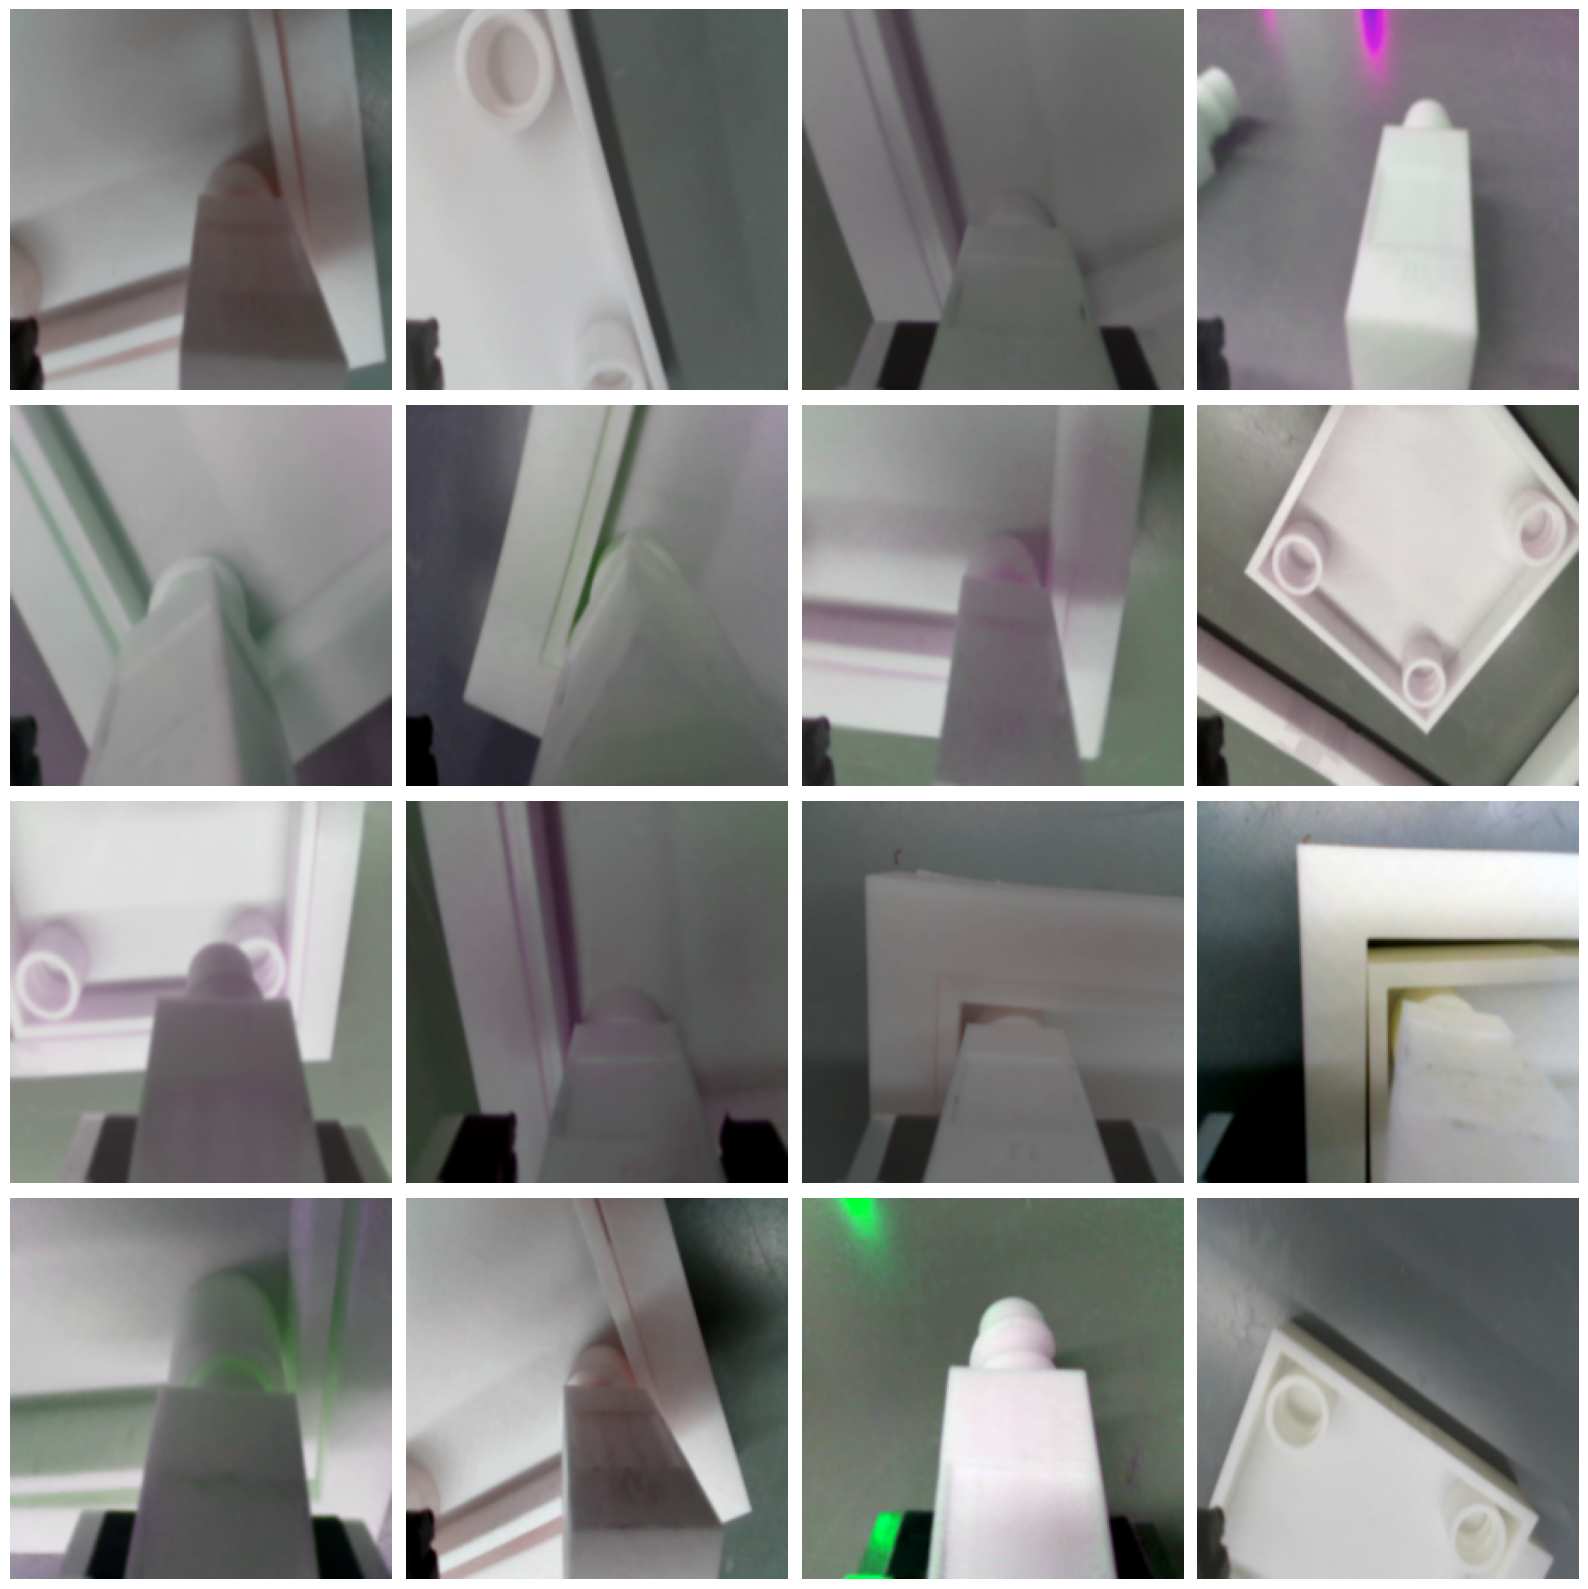

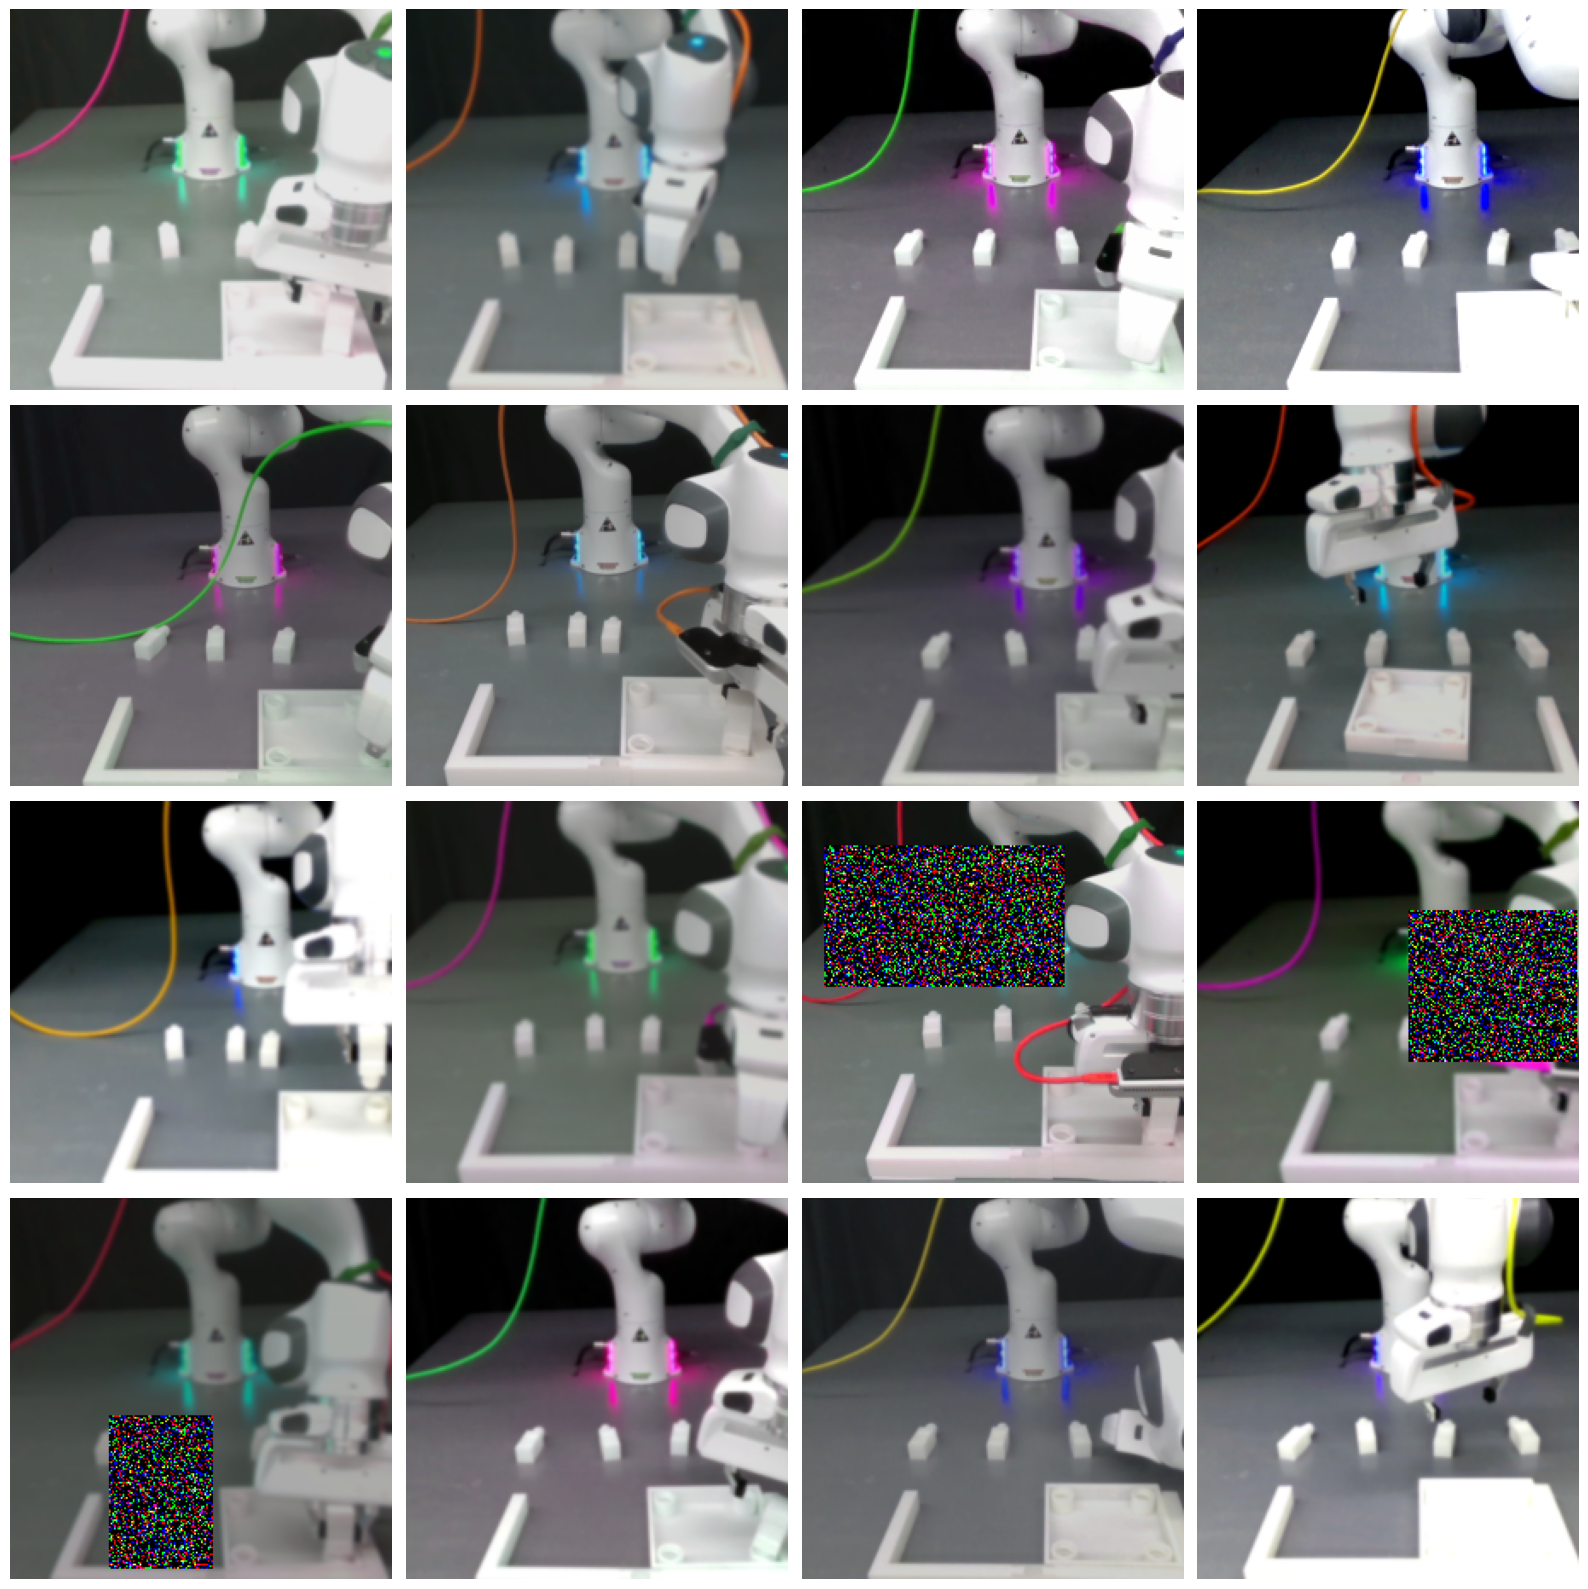

In [19]:
# Plot grids of images
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i in range(4):
    for j in range(4):
        axs[i, j].imshow(color_image1[4 * i + j])
        axs[i, j].axis("off")

# Remove all whitespace
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i in range(4):
    for j in range(4):
        axs[i, j].imshow(color_image2[4 * i + j])
        axs[i, j].axis("off")

# Remove all whitespace
plt.tight_layout()
plt.show()